<a href="https://colab.research.google.com/github/margret255/Kaggle_Reviews/blob/main/PLPdata_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📌 Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Enable inline plotting (only needed in Jupyter)
%matplotlib inline


In [2]:
try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    print("✅ Iris dataset loaded successfully!\n")
except Exception as e:
    print("❌ Error loading dataset:", str(e))


✅ Iris dataset loaded successfully!



In [3]:
# Preview the data
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [5]:
# Summary statistics
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [7]:
# Count of each species
species_counts = df['species'].value_counts()
print("Species counts:\n", species_counts)


Species counts:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [8]:
# Mean sepal length by species
mean_sepal_length = df.groupby('species')['sepal length (cm)'].mean()
print("\nAverage Sepal Length per Species:\n", mean_sepal_length)



Average Sepal Length per Species:
 species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal length (cm), dtype: float64


<ipython-input-8-9cac1b4a2c4d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_sepal_length = df.groupby('species')['sepal length (cm)'].mean()


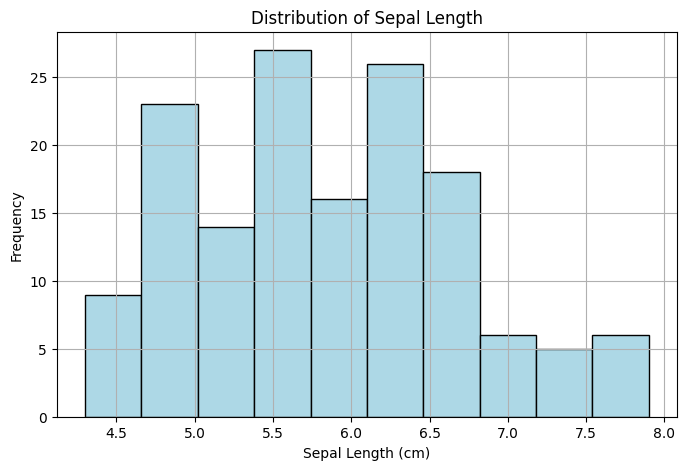

In [9]:
plt.figure(figsize=(8,5))
plt.hist(df['sepal length (cm)'], bins=10, color='lightblue', edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


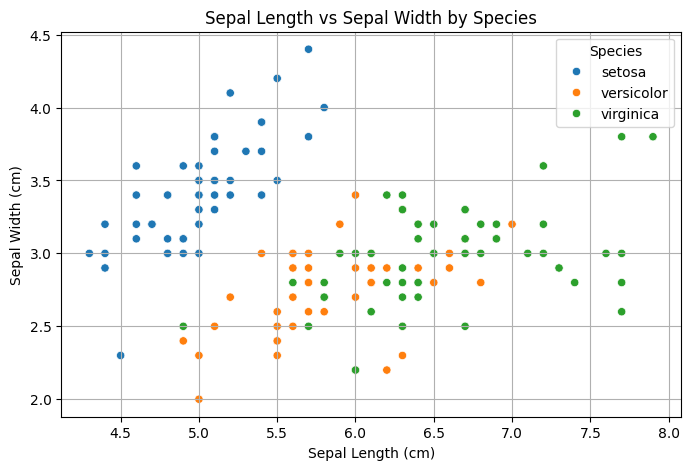

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df)
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()


<ipython-input-11-35820bf31a92>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal length (cm)', data=df, palette='Set2')


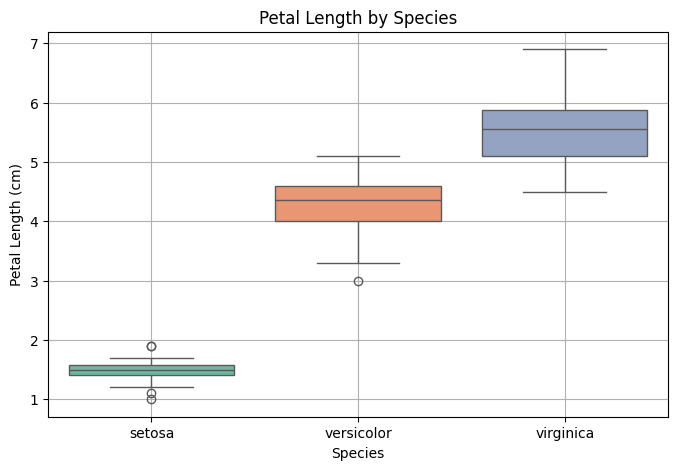

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='species', y='petal length (cm)', data=df, palette='Set2')
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()


In [12]:
# Optional: Save your cleaned dataset to CSV
df.to_csv('iris_cleaned.csv', index=False)
